# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter('ignore', ConvergenceWarning)
data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str)).dt.year
data.set_index('year', inplace=True)


In [8]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

Text(0.5, 1.0, 'Time Series Plot')

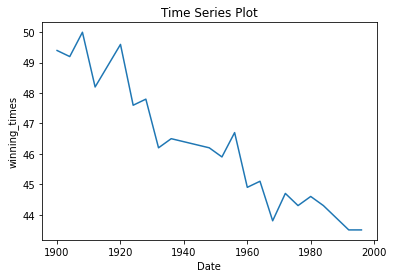

In [9]:
# Plot the time series

# create a figure and axis object
fig, ax = plt.subplots()

# plot the time series data
ax.plot(data)

# set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('winning_times')
ax.set_title('Time Series Plot')

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

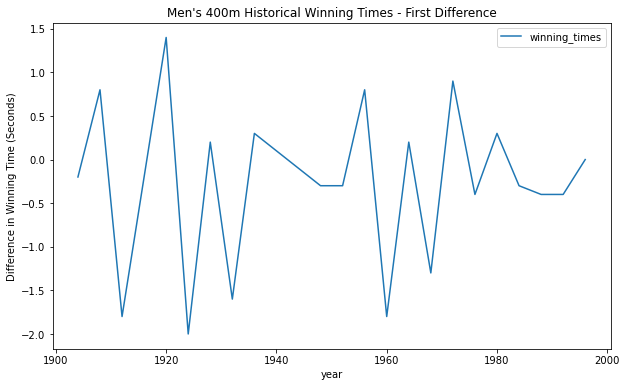

In [11]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff.plot(figsize=(10,6))
plt.ylabel("Difference in Winning Time (Seconds)")
plt.title("Men's 400m Historical Winning Times - First Difference")
plt.show()

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

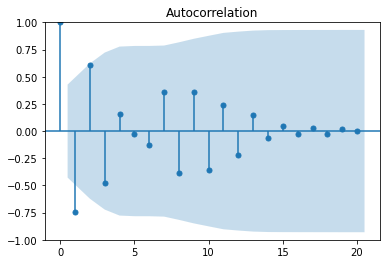

In [12]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_diff, lags=20)
plt.show()


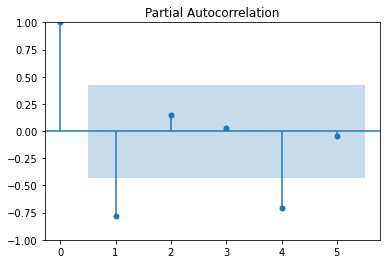

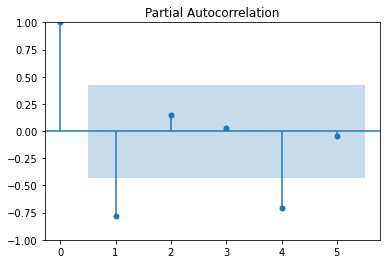

In [14]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_diff.dropna(), lags=5)


Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [16]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_diff, order=(1, 0, 1))
results = model.fit()
print(results.summary())




c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.958
Date:                Sun, 19 Mar 2023   AIC                             47.916
Time:                        22:22:45   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2850      0.087     -3.266      0.001      -0.456      -0.114
ar.L1         -0.7707      0.177     -4.349      0.000      -1.118      -0.423
ma.L1          0.1172      0.285      0.412      0.6

## What is your final model? Why did you pick this model?

In [17]:
# Your comments here
# AIC:47.916
# BIC:52.094

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 